# Prosjektoppgave - statistisk kvalitetskontroll

Mål med oppgaven:
* Deskriptiv statistikk
* Lage Shewhart- og s-diagram
* Tolkning av kapabilitetsindeks

En bedrift er ansvarlig for sløying og pakking av fisk og ønsker å foreta kontrollmålinger for å sikre at vekten av hver fiskefilet de selger til kundene sine er korrekt. Anta at bedriften hver halvtime gjennomfører en stikkprøve der de veier $n = 5$ tilfeldige valgte fiskefileter. Bedriftene gjør $k = 10$ stikkprøver. 

Resultatene er oppgitt i hver tabellen der hver rad i tabellen svarer til en stikkprøve. Vekten er oppgitt i gram.

In [1]:
n = 5
k = 10

tot = n * k

mu0 = 100
sigma0 = 1

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#pip install tabulate
np.random.seed(seed=1)

df = pd.DataFrame(mu0 + sigma0 * np.random.randn(k, n))

from IPython.display import HTML, display
display(df)

import statistics
import scipy as sy
import math
import cmath

#lagrer tabellen som en LaTex-"kode"
with open('Stikkprøver.tex','w') as tf:
    tf.write(df.to_latex())

,0,1,2,3,4
0,101.624345,99.388244,99.471828,98.927031,100.865408
1,97.698461,101.744812,99.238793,100.319039,99.750630
2,101.462108,97.939859,99.677583,99.615946,101.133769
3,98.900109,99.827572,99.122142,100.042214,100.582815
4,98.899381,101.144724,100.901591,100.502494,100.900856
5,99.316272,99.877110,99.064231,99.732112,100.530355
6,99.308339,99.603246,99.312827,99.154794,99.328754
7,99.987335,98.882690,100.234416,101.659802,100.742044
8,99.808164,99.112371,99.252842,101.692455,100.050808
9,99.363004,100.190915,102.100255,100.120159,100.617203


a)

Visualiser dataene. 

Diskuter kort hva du ser.

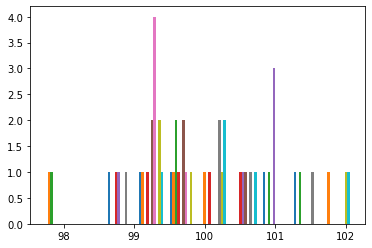

In [2]:
# Svar på a)

norm = plt.hist(df)
plt.savefig('norm.png')
#Vi ser at flest fisk har vekt innenfor intervallet [99, 101]. Dette stemmer overens med oppgitt standardavvik i oppgaven (1).
#Grafen ser også normalfordelt ut.

b)

Finn gjennomsnitt og standardavvik i hvert av de $k$ forsøkene. 

Finn tallverdier for nedre og øvre kontrollgrense når $z_{\alpha / 2} =3$.

Finn også nedre og øvre varselgrense.

Bedriften ønsker å selge fileter med vekt $\mu_0 = 100$ gram. Finn minste antall kontroller bedriften må forvente å gjennomføre for å oppdage at vekten har endret set til $\mu_1 = 99,5$ gram. 

,0
0,100.055371
1,99.750347
2,99.965853
3,99.694970
4,100.469809
5,99.704016
6,99.341592
7,100.301257
8,99.983328
9,100.478307


,0
0,99.974485


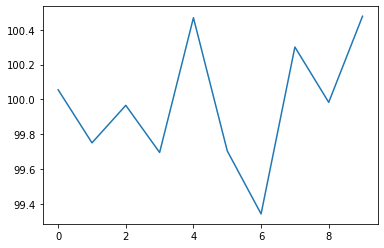

In [3]:
# Svar på b) 
#Gjennomsnittet til hver k måling.
mean=df.apply(lambda x: x.mean(), axis=1)
with open('Gjennomsnitt1.tex','w') as gj:
    gj.write(mean.to_latex())

gj_plot = mean.plot()
dd = pd.DataFrame(mean)
display(dd)

#Gjennomsnittet til gjennomsnittet av hver k måling.
mean_2=dd.apply(lambda x: x.mean(), axis=0)

dd_2 = pd.DataFrame(mean_2)
display(dd_2)

plt.savefig('gj_plot.png')

,0
0,1.137604
1,1.480981
2,1.406502
3,0.686725
4,0.907615
5,0.564194
6,0.162369
7,1.019226
8,1.030598
9,1.013012


,0
0,0.940883


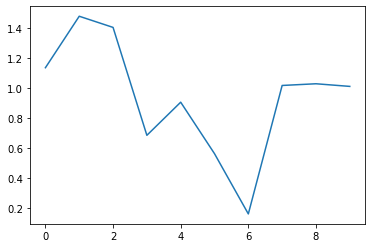

In [4]:
#Standardavvik av k forsøk.


avvik= df.std(axis=1)
with open('Avvik1.tex','w') as av1:
    av1.write(avvik.to_latex())

avvik.plot()
ak = pd.DataFrame(avvik)
display(ak)
plt.savefig('avvik1.png')

#Gjennomsnittet av standardavviket til de k kontrollene.
avvik_mean = ak.apply(lambda x: x.mean(), axis=0)
am = pd.DataFrame(avvik_mean)
display(am)


In [5]:
#Øvre kontrollgrense
UCL_df = dd_2+((3*am)/(math.sqrt(10)))
print("{:s}\n{:s}\n".format("Øvre kontrollgrense.", len("Øvre kontrollgrense.") * "-"))
print(UCL_df)
#Nedre kontrollgrense
LCL_df = dd_2-((3*am)/(math.sqrt(10)))
print("{:s}\n{:s}\n".format("Nedre kontrollgrense.", len("Nedre kontrollgrense.") * "-"))
print(LCL_df)

Øvre kontrollgrense.
--------------------

            0
0  100.867085
Nedre kontrollgrense.
---------------------

           0
0  99.081886


In [6]:
#Øvre varselgrense
UWL_df= dd_2+((2*am)/(math.sqrt(10)))
print("{:s}\n{:s}\n".format("Øvre varselgrense.", len("Øvre varselgrense.") * "-"))
print(UWL_df)

#Nedre varselgrense
LWL_df= dd_2-(((2*am)/(math.sqrt(10))))
print("{:s}\n{:s}\n".format("Nedre varselgrense.", len("Nedre varselgrense.") * "-"))
print(LWL_df)

Øvre varselgrense.
------------------

            0
0  100.569552
Nedre varselgrense.
-------------------

           0
0  99.379419


In [11]:
#Bedriften ønsker å selge fileter med vekt 𝜇0=100 gram. 
#Finn minste antall kontroller bedriften må forvente å gjennomføre for å oppdage at vekten har endret set til 𝜇1=99,5 gram. 
from scipy import stats
from sympy.solvers import solveset
from sympy import Symbol

#Oppgave B
#Standardavvik

    #1.137604
 	#1.480981
 	#1.406502
 	#0.686725
 	#0.907615
 	#0.564194
 	#0.162369
 	#1.019226
 	#1.030598
 	#1.013012

a = (0.940883**2)
b = 1

#Gjennomsnittet av standardverdiene til hver måling.
c = -1

    # To take coefficient input from the users
    # a = float(input('Enter a: '))
    # b = float(input('Enter b: '))
    # c = float(input('Enter c: '))

    # calculate the discriminant
d = (b**2) - (4*a*c)

    # find two solutions
p1 = (-b-cmath.sqrt(d))/(2*a)
p2 = (-b+cmath.sqrt(d))/(2*a)

print('Sannsynlighetene er {0} og {1}'.format(p1,p2))


#Forventningsverdi



Sannsynlighetene er (-1.7683897835859035+0j) og (0.6387791900081725+0j)


Bedriften har bestemt seg for å gjennomføre $m = 10$ nye stikkeprøver neste dag gjennomført som før. Resultatet av disse gitt i tabellen under. 

In [8]:
k_ny = 10
n= 5
np.random.seed(seed=2)
df_ny = pd.DataFrame(mu0 -.5 + sigma0 * 2 * np.random.randn(k_ny, n))
display(df_ny)

with open('Df_ny.tex','w') as df2:
    df2.write(df_ny.to_latex())



,0,1,2,3,4
0,98.666484,99.387466,95.227608,102.780542,95.913129
1,97.816505,100.505763,97.009424,97.384096,97.681985
2,100.602908,104.084416,99.583079,97.264149,100.578117
3,98.307681,99.461739,101.850002,98.004258,99.518051
4,97.743784,99.187132,100.013141,97.522442,98.822356
5,99.027632,98.224690,97.124775,96.657566,99.193010
6,98.961886,103.962734,94.630465,99.725453,100.240889
7,102.219268,100.503714,97.811573,99.500020,100.584705
8,98.872984,101.042023,95.763819,102.962369,102.435356
9,98.828645,100.722682,99.595941,97.841729,99.675420


c)

Bedriften ønsker å kontrollere om det har inntruffet et kvalitetsavvik. Formuler situasjonen som en hypotese.

Bruk kontrollgrensene du fant over og lag et Shewhart $\bar{x}$-diagram for de neste $m = 10$ observasjonene. 

Diskuter hva du ser. 

,0
0,98.395046
1,98.079554
2,100.422534
3,99.428346
4,98.657771
5,98.045534
6,99.504285
7,100.123856
8,100.215310
9,99.332884


,0
0,99.220512


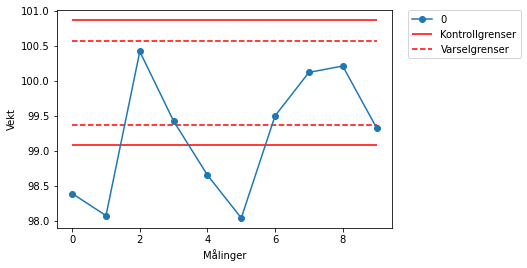

In [9]:
# Svar på c)
ave=df_ny.apply(lambda x: x.mean(), axis=1)
average=pd.DataFrame(ave)
display(average)
with open('Df_ny_average.tex','w') as df3:
    df3.write(average.to_latex())

tru_ave = average.apply(lambda x: x.mean(), axis=0)
average_tru = pd.DataFrame(tru_ave)
display(average_tru)

#Shewhart diagram.
average.plot(marker = 'o')
plt.xlabel('Målinger')
plt.ylabel('Vekt')
plt.hlines(y = UCL_df, xmin = 0, xmax = 9, color ='r', label = 'Kontrollgrenser')
plt.hlines(y = LCL_df, xmin = 0, xmax = 9, color ='r')
plt.hlines(y = LWL_df, xmin = 0, xmax = 9, color ='r', linestyle = 'dashed')
plt.hlines(y = UWL_df, xmin = 0, xmax = 9, color ='r',linestyle= 'dashed', label = 'Varselgrenser')
plt.legend(bbox_to_anchor= (1.05, 1), loc ='upper left', borderaxespad = 0.)

plt.savefig('average.png', bbox_inches='tight')
plt.show()
# Som vi ser ligger gjennomsnittlig vekt i gruppe 0, 1, 4 og 5 under kontrollgrensen til Shewhart-diagrammet.
# Disse gruppene må derfor fjernes fra distribusjonen.
# Gruppe 9 ligger under varselgrensa og bør sjekkes for individuelle feil.

#Hypotese: H0 = 0
        #  H1 >= 1

d)

Lag et $s$-diagram for spredning. 

Spesifiser hypotesen.

En butikk kjøper fisk av bedriften. Butikken har stilt følgende krav om toleransegrense til produsenten: $T_L = 97$ og $T_u = 103$. 

Beregn kapabilitet og kapalitetsindeks.

Tolk kort kapabilitetsindeksen.

,0
0,1.951762


,0
0,1.142325


,0
0,4.981433


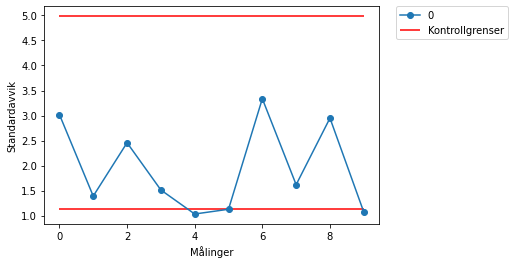

,0
0,11.71057


,0
0,0.512358


In [10]:
# Svar på d)

#Gjennomsnittlig standardavvik
stdav = df_ny.std(axis=1)
standard = pd.DataFrame(stdav)


mean_stdav = standard.apply(lambda x: x.mean(), axis=0)
std_tru = pd.DataFrame(mean_stdav)
display(std_tru)

#Utregning av øvre- og nedre kontrollgrense
n1 = 10
frihet = n-1
X1_L = stats.chi2.ppf(0.002, n1-1)

X2_U = stats.chi2.ppf(1-0.002, n1-1)

NKG = std_tru*math.sqrt((X1_L)/frihet)
display(NKG)

ØKG = std_tru*(math.sqrt(X2_U/frihet))
display(ØKG)

#s-diagram
standard.plot(marker = 'o')
plt.xlabel('Målinger')
plt.ylabel('Standardavvik')

plt.hlines(y = ØKG, xmin = 0, xmax = 9, color ='r', label = 'Kontrollgrenser')
plt.hlines(y = NKG, xmin = 0, xmax = 9, color ='r')

plt.legend(bbox_to_anchor= (1.05, 1), loc ='upper left', borderaxespad = 0.)

plt.savefig('s_diagram.png', bbox_inches='tight')
plt.show()


#Gruppe 4, 5 og 6 ligger på grensen til nedre kontrollgrense og bør sjekkes for avvikende målinger.


TL = 97
TU = 103

#kapabilitet
K = 6*std_tru
display(K)

#Kapabilitetsindeks
KI = (TU-TL)/K
display(KI)

# Ettersom KI < 1 så er kapabiliteten (det området vi kan levere produktet i) større enn det området kunden ønsker produktene i.
# Her må det gripes inn og senke variasjonen.

# Ønskelig tilfelle er at KI > 1, ettersom vi kun trenger å finne en god sentrering.